# Zomato Data Analysis Project


# Importing libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create the DataFrame

In [15]:
DataFrame = pd.read_csv("Zomato Data .csv")
DataFrame.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [16]:
DataFrame.isnull()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
143,False,False,False,False,False,False,False
144,False,False,False,False,False,False,False
145,False,False,False,False,False,False,False
146,False,False,False,False,False,False,False


# Convert the data type  of column - rate

In [17]:
def handleRate(value):
    value = str(value).split('/')
    value = value[0]
    return float(value)
DataFrame['rate'] = DataFrame['rate'].apply(handleRate)
DataFrame.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Text(0.5, 0, 'Restaurant Type')

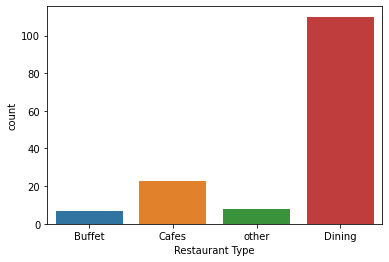

In [18]:
sns.countplot(x=DataFrame["listed_in(type)"])
plt.xlabel("Restaurant Type")

# Conclusion - majority of the restaurant falls in dinning category

Text(0, 0.5, 'Votes')

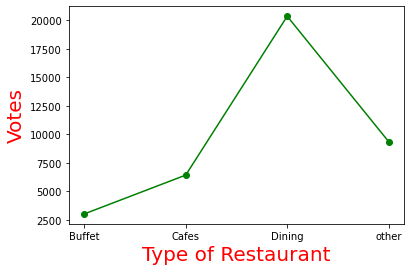

In [19]:
grouped_data = DataFrame.groupby("listed_in(type)")['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result,c="green",marker='o')
plt.xlabel("Type of Restaurant",c='red',size=20)
plt.ylabel("Votes",c='red',size=20)

# Conclusion Dinning Restaurant received maximum votes

In [20]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


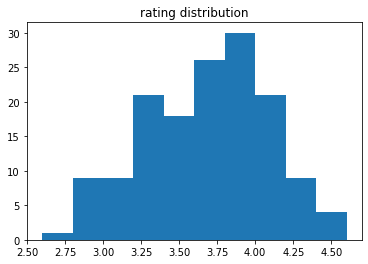

In [24]:
plt.hist(DataFrame['rate'],bins=10)
plt.title("rating distribution")
plt.show()

# conclusion -the majority restaurants received rating from 3.5-4.0 

# Average order spending by couples

<AxesSubplot:xlabel='approx_cost(for two people)', ylabel='count'>

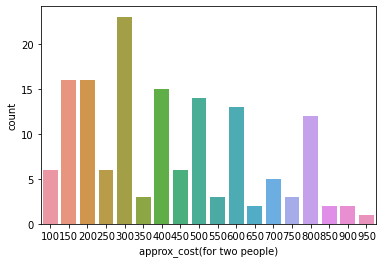

In [28]:
couple_data= DataFrame["approx_cost(for two people)"]
sns.countplot(x=couple_data)

# conclusion - the majority of couples preffer restaurants with an approximate cost of 300rs

# which mode receive maximum rating

<AxesSubplot:xlabel='online_order', ylabel='rate'>

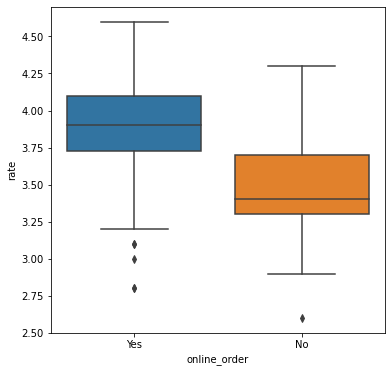

In [33]:
plt.figure(figsize = (6,6))
sns.boxplot(x='online_order',y='rate',data=DataFrame)

# conclusion- offline order received lower rating in comparison to online order

# which type of restaurant received more offline orders

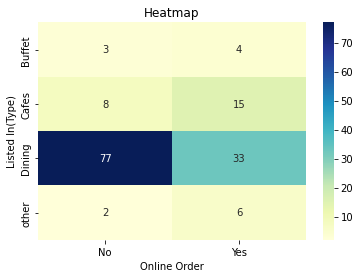

In [35]:
pivot_table = DataFrame.pivot_table(index="listed_in(type)",columns='online_order',aggfunc='size',fill_value=0)
sns.heatmap(pivot_table,annot = True,cmap = 'YlGnBu',fmt = 'd')
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("Listed In(Type)")
plt.show()

# conclusion - Dining restaurants primarly accept offline orders , whereas cafes primarly receive online order. This suggests that clients prefer orders in person at restaurants , but prefer online ordering at cafes